In [1]:
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1=pd.read_csv('C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/CL/python/동계인턴십_Data_1000/phenotype_1000.txt',engine="python",sep=" ")

In [3]:
data2=pd.read_csv('C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/CL/python/동계인턴십_Data_1000/KCPS_r2_0.01_1000.csv')

In [4]:
data2

,FID,IID,rs4970382,rs7513297,rs144969472,rs1695860,rs3765908,rs34135959,1:1959861_GCC/G,rs12057498,...,rs144291562,rs28479081,rs73891199,rs5771192,22:50469081_C/G,rs909691,rs34557850,rs2076714,rs131727,rs6009953
0,KCPS000029,KCPS000029,0,1,0,2,1,1,1,0,...,0,2,0,2,0,1,1,1,0,2
1,KCPS000056,KCPS000056,0,2,0,1,0,1,2,0,...,0,1,0,1,0,0,1,0,2,0
2,KCPS000058,KCPS000058,0,0,0,1,2,0,1,0,...,0,2,0,0,0,2,0,2,0,0
3,KCPS000081,KCPS000081,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,1,1,1,0
4,KCPS000087,KCPS000087,1,0,0,1,1,2,1,1,...,0,2,0,2,0,1,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,KCPS015939,KCPS015939,0,1,0,2,1,1,1,1,...,0,0,0,1,0,1,2,0,0,1
996,KCPS015941,KCPS015941,2,2,0,2,0,1,0,1,...,0,2,0,1,0,0,0,2,0,2
997,KCPS015947,KCPS015947,1,1,0,0,0,2,1,0,...,0,1,0,2,0,2,1,1,1,1
998,KCPS015961,KCPS015961,0,0,0,2,0,1,1,1,...,0,2,0,0,0,1,1,1,0,0


In [5]:
for i in range(2,15190):
    data2.columns.values[i]=i

In [6]:
data2

,FID,IID,2,3,4,5,6,7,8,9,...,15180,15181,15182,15183,15184,15185,15186,15187,15188,15189
0,KCPS000029,KCPS000029,0,1,0,2,1,1,1,0,...,0,2,0,2,0,1,1,1,0,2
1,KCPS000056,KCPS000056,0,2,0,1,0,1,2,0,...,0,1,0,1,0,0,1,0,2,0
2,KCPS000058,KCPS000058,0,0,0,1,2,0,1,0,...,0,2,0,0,0,2,0,2,0,0
3,KCPS000081,KCPS000081,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,1,1,1,0
4,KCPS000087,KCPS000087,1,0,0,1,1,2,1,1,...,0,2,0,2,0,1,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,KCPS015939,KCPS015939,0,1,0,2,1,1,1,1,...,0,0,0,1,0,1,2,0,0,1
996,KCPS015941,KCPS015941,2,2,0,2,0,1,0,1,...,0,2,0,1,0,0,0,2,0,2
997,KCPS015947,KCPS015947,1,1,0,0,0,2,1,0,...,0,1,0,2,0,2,1,1,1,1
998,KCPS015961,KCPS015961,0,0,0,2,0,1,1,1,...,0,2,0,0,0,1,1,1,0,0


In [7]:
df=data1.loc[:,['FID','AGE_B', 'SMOK_B', 'ALCO_B','EXER_B','HT_B', 'WT_B', 'WAIST_B', 'SBP_B', 'DBP_B', 'CHO_B','LDL_B', 'TG_B', 'HDL_B', 'FBS_B', 'GOT_B', 'GPT_B', 'GGT_B', 'URIC_B','BIL', 'WBC', 'CREAT', 'STOMA', 'COLON', 'LIVER', 'LUNG','PROST', 'THROI', 'BREAC', 'RECTM','SEX1', 'CRC']]
df.head()

,FID,AGE_B,SMOK_B,ALCO_B,EXER_B,HT_B,WT_B,WAIST_B,SBP_B,DBP_B,...,STOMA,COLON,LIVER,LUNG,PROST,THROI,BREAC,RECTM,SEX1,CRC
0,KCPS000029,48,3.0,2.0,1.0,168.0,69.8,82.0,102.0,69.0,...,0,0,0,0,0,0,0,0,1,0
1,KCPS000056,53,1.0,2.0,1.0,161.0,67.9,86.0,127.0,67.0,...,0,0,0,0,0,0,1,0,2,0
2,KCPS000058,60,1.0,1.0,2.0,153.0,73.3,97.0,133.0,76.0,...,0,0,0,0,0,0,0,0,2,0
3,KCPS000081,42,1.0,2.0,2.0,167.0,65.1,77.5,97.0,70.0,...,1,0,0,0,0,0,0,0,1,0
4,KCPS000087,57,3.0,2.0,2.0,165.0,51.8,73.0,98.0,76.0,...,0,0,0,0,0,0,0,0,1,0


In [8]:
data = pd.concat([df,data2],axis=1)

In [9]:
data.dropna(inplace=True)

In [10]:
data

,FID,AGE_B,SMOK_B,ALCO_B,EXER_B,HT_B,WT_B,WAIST_B,SBP_B,DBP_B,...,15180,15181,15182,15183,15184,15185,15186,15187,15188,15189
0,KCPS000029,48,3.0,2.0,1.0,168.0,69.8,82.0,102.0,69.0,...,0,2,0,2,0,1,1,1,0,2
1,KCPS000056,53,1.0,2.0,1.0,161.0,67.9,86.0,127.0,67.0,...,0,1,0,1,0,0,1,0,2,0
2,KCPS000058,60,1.0,1.0,2.0,153.0,73.3,97.0,133.0,76.0,...,0,2,0,0,0,2,0,2,0,0
3,KCPS000081,42,1.0,2.0,2.0,167.0,65.1,77.5,97.0,70.0,...,0,0,0,0,0,0,1,1,1,0
4,KCPS000087,57,3.0,2.0,2.0,165.0,51.8,73.0,98.0,76.0,...,0,2,0,2,0,1,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,KCPS015867,37,3.0,2.0,2.0,173.0,69.4,82.0,145.0,87.0,...,0,2,0,1,0,0,0,1,2,0
996,KCPS015941,57,2.0,2.0,1.0,159.0,61.4,87.0,109.0,80.0,...,0,2,0,1,0,0,0,2,0,2
997,KCPS015947,50,2.0,2.0,1.0,163.0,66.4,82.0,150.0,82.0,...,0,1,0,2,0,2,1,1,1,1
998,KCPS015961,45,1.0,2.0,1.0,156.0,48.0,67.5,91.0,60.0,...,0,2,0,0,0,1,1,1,0,0


In [11]:
data.drop('FID',axis=1,inplace=True)

In [12]:
data.drop('IID',axis=1,inplace=True)

In [13]:
#폐암 
features=['LUNG','STOMA','COLON','LIVER','PROST','THROI','BREAC','RECTM']
y_df =data['STOMA']
X_df =data.drop(features, axis=1)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix

In [15]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score # 평가를 위함
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression

In [16]:
# random_state = 156 : 다음에도 같은 데이터를 train, test로 분리 하는 옵션
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_df,y_df,test_size=0.2,random_state=156)

In [17]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred) # 오차 행렬 (평가 지표)
    accuracy = accuracy_score(y_test, pred) # 정확도
    precision = precision_score(y_test, pred) # 정밀도
    recall = recall_score(y_test, pred) # 재현율
    f1 = f1_score(y_test, pred) # F1 (정밀도, 재현율 적정 수준 : 1에 가까울 수록 좋음)
    roc_auc = roc_auc_score(y_test, pred_proba) # AUC (1에 가까울 수록 좋음)
    
    print('오차 행렬\n {}'.format(confusion))
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC: {4:.4f}'
         .format(accuracy, precision, recall, f1, roc_auc))

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
 [[148   0]
 [  9   1]]
정확도 : 0.9430, 정밀도 : 1.0000, 재현율 : 0.1000, F1 : 0.1818, AUC: 0.7541


In [19]:
def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

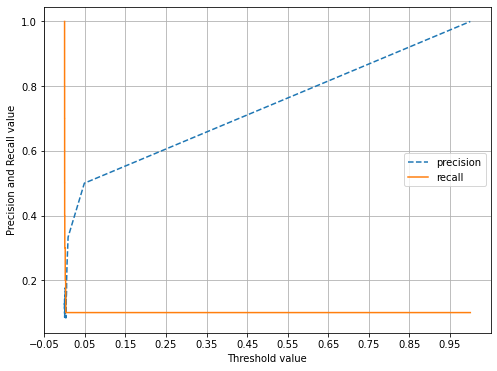

In [20]:
pred_proba_c1 = model.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [21]:
# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X_df)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_df, test_size = 0.2, random_state = 156, stratify=y_df)

# 로지스틱 회귀로 학습, 예측 및 평가 수행. 
model = LogisticRegression()
model.fit(X_train , y_train)
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

오차 행렬
 [[149   0]
 [  9   0]]
정확도 : 0.9430, 정밀도 : 0.0000, 재현율 : 0.0000, F1 : 0.0000, AUC: 0.5563


In [22]:
# Binarizer : threshold 가 0.3이라면, 0.3보다 크면 1 , 작거나 같으면 0으로 출력
# 임곗값 : 0과 1로 예측하는 기준 : 분류 모델(LogisticRegression)은 기본 임곗값이 0.5이다.
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)  
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [23]:
xgboost = XGBClassifier(n_estimators=100)
xgboost.fit(X_train,y_train,eval_set=[(X_test, y_test)],eval_metric="error")
pred = xgboost.predict(X_test)

[0]	validation_0-error:0.07595
[1]	validation_0-error:0.06329
[2]	validation_0-error:0.06329
[3]	validation_0-error:0.05696
[4]	validation_0-error:0.05696
[5]	validation_0-error:0.05696
[6]	validation_0-error:0.05696
[7]	validation_0-error:0.05696
[8]	validation_0-error:0.05696
[9]	validation_0-error:0.05696
[10]	validation_0-error:0.05696
[11]	validation_0-error:0.05696
[12]	validation_0-error:0.05696
[13]	validation_0-error:0.05696
[14]	validation_0-error:0.05696
[15]	validation_0-error:0.05696
[16]	validation_0-error:0.05696
[17]	validation_0-error:0.05696
[18]	validation_0-error:0.05696
[19]	validation_0-error:0.05696
[20]	validation_0-error:0.05696
[21]	validation_0-error:0.05696
[22]	validation_0-error:0.05696
[23]	validation_0-error:0.05696
[24]	validation_0-error:0.05696
[25]	validation_0-error:0.05696
[26]	validation_0-error:0.05696
[27]	validation_0-error:0.05696
[28]	validation_0-error:0.05696
[29]	validation_0-error:0.05696
[30]	validation_0-error:0.05696
[31]	validation_0-

In [24]:
#분류 모델
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix,classification_report #정오분류표
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score #정확도,민감도
from sklearn.metrics import roc_curve, auc #ROC 곡선 그리기

#최적화
from sklearn.model_selection import learning_curve,validation_curve #학습곡선, 검증곡선
from sklearn.model_selection import GridSearchCV #하이퍼파라미터 튜닝
from sklearn.model_selection import cross_val_score #교차타당도 #추가

In [25]:
logistic = LogisticRegression(solver='liblinear',penalty='l2')
tree = DecisionTreeClassifier(max_depth=None,criterion='entropy')
knn = KNeighborsClassifier(n_neighbors=1,p=2,metric='minkowski')
forest = RandomForestClassifier()
adaboost = AdaBoostClassifier()
voting_estimators = [('logistic',logistic),('tree',tree),('knn',knn)]
voting = VotingClassifier(estimators=voting_estimators,voting='soft')
#소프트 보팅 이용 (분류기들의 레이블)
#투표 기법 사용
a_clf_labels = ['Logistic regression','Decision tree','KNN','Majority voting']
a_all_clf = [logistic,tree,knn,voting]

#배깅
b_clf_labels = ['Decision tree','Random forest']
b_all_clf = [tree,forest]

#부스팅
c_clf_labels = ['Decision tree','Ada boost']
c_all_clf = [tree,adaboost]

In [26]:
for clf, label in zip(a_all_clf,a_clf_labels):
    scores = cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10,scoring='roc_auc')
    print('ROC AUC: %0.3f (sd : %0.3f),[%s]' %(scores.mean(),scores.std(),label))

ROC AUC: 0.595 (sd : 0.142),[Logistic regression]
ROC AUC: 0.495 (sd : 0.070),[Decision tree]
ROC AUC: 0.508 (sd : 0.070),[KNN]
ROC AUC: 0.585 (sd : 0.139),[Majority voting]


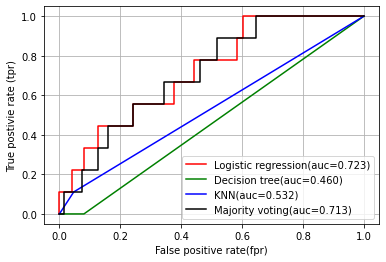

In [27]:
colors=['r','g','b','black']
for clf,label,clr in zip(a_all_clf,a_clf_labels,colors):
    clf.fit(X_train,y_train)
    y_pred = clf.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_true=y_test,y_score=y_pred)
    roc_auc=auc(x=fpr,y=tpr)
    plt.plot(fpr,tpr,color=clr,label='%s(auc=%0.3f)'%(label,roc_auc))

plt.legend(loc='lower right')
plt.grid()
plt.xlabel('False positive rate(fpr)')
plt.ylabel('True postivie rate (tpr)')
plt.show()

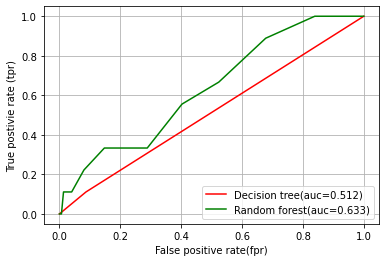

In [28]:
colors=['r','g']
for clf,label,clr in zip(b_all_clf,b_clf_labels,colors):
    clf.fit(X_train,y_train)
    y_pred = clf.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_true=y_test,y_score=y_pred)
    roc_auc=auc(x=fpr,y=tpr)
    plt.plot(fpr,tpr,color=clr,label='%s(auc=%0.3f)'%(label,roc_auc))

plt.legend(loc='lower right')
plt.grid()
plt.xlabel('False positive rate(fpr)')
plt.ylabel('True postivie rate (tpr)')
plt.show()

In [29]:
feat_labels= X_df.columns
importance =forest.feature_importances_
indices=np.argsort(importance)[::-1]
for f in range(X_train.shape[1]):
    print("%3d) %-*s %f" %(f+1,30,feat_labels[indices[f]],importance[indices[f]]))

  1) FBS_B                          0.002854
  2) 8144                           0.002394
  3) 6193                           0.002230
  4) 4805                           0.002149
  5) LDL_B                          0.002125
  6) 5521                           0.002101
  7) 10090                          0.002095
  8) 3887                           0.002028
  9) HDL_B                          0.002026
 10) 9723                           0.002008
 11) 9477                           0.002000
 12) 3789                           0.001929
 13) 5362                           0.001917
 14) 3609                           0.001848
 15) CHO_B                          0.001711
 16) 8793                           0.001707
 17) 10272                          0.001687
 18) 1075                           0.001637
 19) 810                            0.001615
 20) 1835                           0.001608
 21) 11503                          0.001600
 22) 1903                           0.001581
 23) 5432 

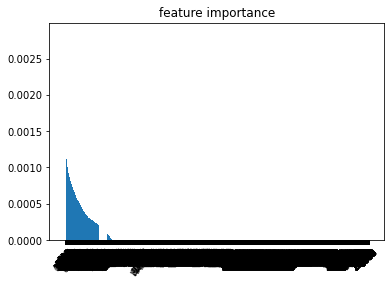

In [30]:
plt.bar(range(X_train.shape[1]),importance[indices],align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices],rotation=45,size=8)
plt.title('feature importance')
plt.show()